## 1 算法概述

到目前为止，我们讨论的学习算法都是直接对 $p(y|x;\theta)$ 建模，即对给定的 $x, y$ 的条件分布。这里我们将讨论一种不同类型的学习方法。

学习算法可分为两种，一种时尝试去直接学习得到 $p(y|x)$ (例如逻辑回归)，或者尝试去学习直接将输入映射到0或1的方法（例如感知器算法），这种算法被称为 **「判别学习算法(discriminative earning algorithm)」**；而另外一种学习算法被称为 **「生成学习算法generative learning algorithm」**，这种算法会尝试对 $p(x|y)$ 以及 $p(y)$ 建模。

当我们为 $p(y)$ (被称为 **「class priors」)** 和 $p(x|y)$ 建模后，我们的算法会使用 **「贝叶斯定理Bayes rule」** 来计算给定 $x$ 后 $y$ 的 **「后验概率(posterior distribution)」**：

$$p(y|x) = \frac{p(x|y)p(y)}{p(x)}$$

其中分母可以通过 $p(x)=p(x|y=1)p(y=1)+p(x|y=0)p(y=0)$ 得到（针对二分类）。

对于分类问题我们需要对每种 $y$ 的情况分别进行建模。当有一个新的 $x$ 时，计算每个 $y$ 的后验概率，并取概率最大的那个 $y$ 作为预测输出。

由于只需要比较大小，而 $p(x)$ 对于大家都一样，所以可以忽略分母，得到下式：

$$\text{argmax}_{y} p(y|x)=\text{argmax}_{y} \frac{p(x|y)p(y)}{p(x)}=\text{argmax}_{y}p(x|y)p(y)$$

## 2 高斯判别分析

我们学习的第一个生成学习算法叫 **「高斯判别分析(Gaussian discriminant analysis)」（GDA）**。在这个模型中，我们会假设 $p(x|y)$ 属于 **「多元正态分布(multivariate normal distribution)」**。在介绍 GDA 之前，首先简单介绍一下多元正态分布的属性。

### 2.1 多元正态分布

多元正态分布是在 n 维空间中的，其参数有：

* 「均值向量(mean vector)」: $\mu \in \mathbb{R}^n$

* 「协方差矩阵(covariance matrix)」: $\Sigma \in \mathbb{R}^{n \times n}, \Sigma \geq 0$ 对称且半正定（所有特征值均不小于零）

我们将分布记作 $N(\mu,\Sigma)$ ，其 **「概率密度(density)」** 公式为：

$$p(x;\mu,\Sigma)=\frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}}exp(-\frac{1}{2}(x-\mu)^T \Sigma^{-1}(x-\mu))$$

其中 $|\Sigma|$ 表示 $\Sigma$ 的行列式。对于一个属于多元正态分布 $N \sim (\mu, \Sigma)$ 的随机变量 $X$， 根据期望和方差的计算公式可以得到：

$$E[X]=\int_x xp(x;\mu, \Sigma)dx$$

$$Cov(X)=E[(X-E[X])(X-E[X])^T]=\Sigma$$

下面给出一些二元高斯分布的概率密度函数：

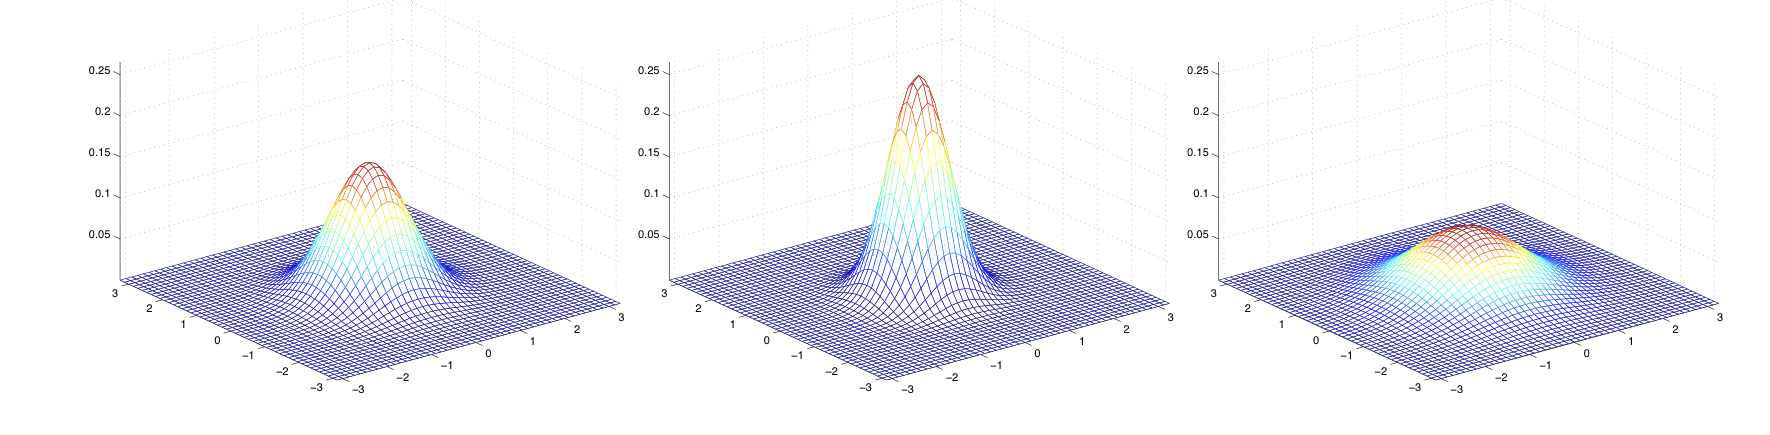

左边的图显示的分布均值为 $0$（ $2 \times 1$ 的向量），协方差矩阵为 $I$（$2 \times 2$ 的单位矩阵）。这样的正态分布又被称为 **「标准正态分布」**；中间的图显示的分布均值为 $0$ 且 $\Sigma=0.6I$；右边的图显示的分布 $\Sigma=2I$。可以看到随着 $\Sigma$ 的变大，分布变得越来越“展开”，看起来就像变得越来越“扁”。

让我们来看看更多的例子：

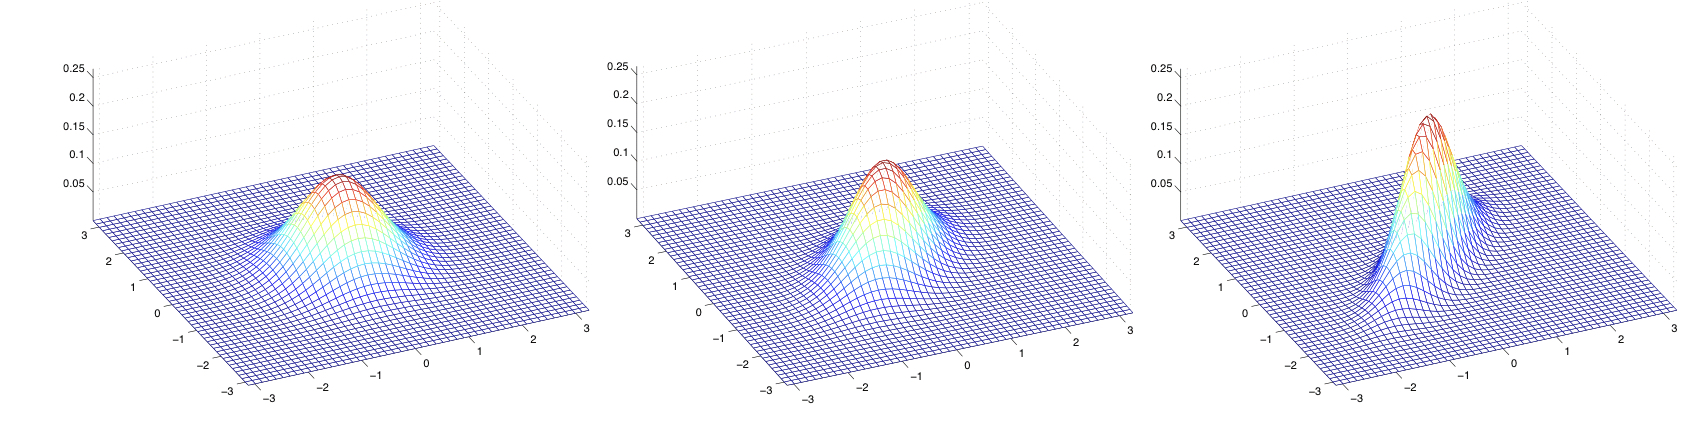

上图表示的分布均值均为 $0$ ，对应的协方差矩阵为:

$$\Sigma=
 \begin{bmatrix}
   1 & 0 \\
   0 & 1
  \end{bmatrix} ;\Sigma=
 \begin{bmatrix}
   1 & 0.5 \\
   0.5 & 1
  \end{bmatrix} ;\Sigma=
 \begin{bmatrix}
   1 & 0.8 \\
   0.8 & 1
  \end{bmatrix} 
$$

左边的图就是标准正态分布，而可以看到随着非对角线上数值的增大，分布在45度方向上压缩的幅度越大，通过下面的轮廓图可以更清楚地展现这个特点：

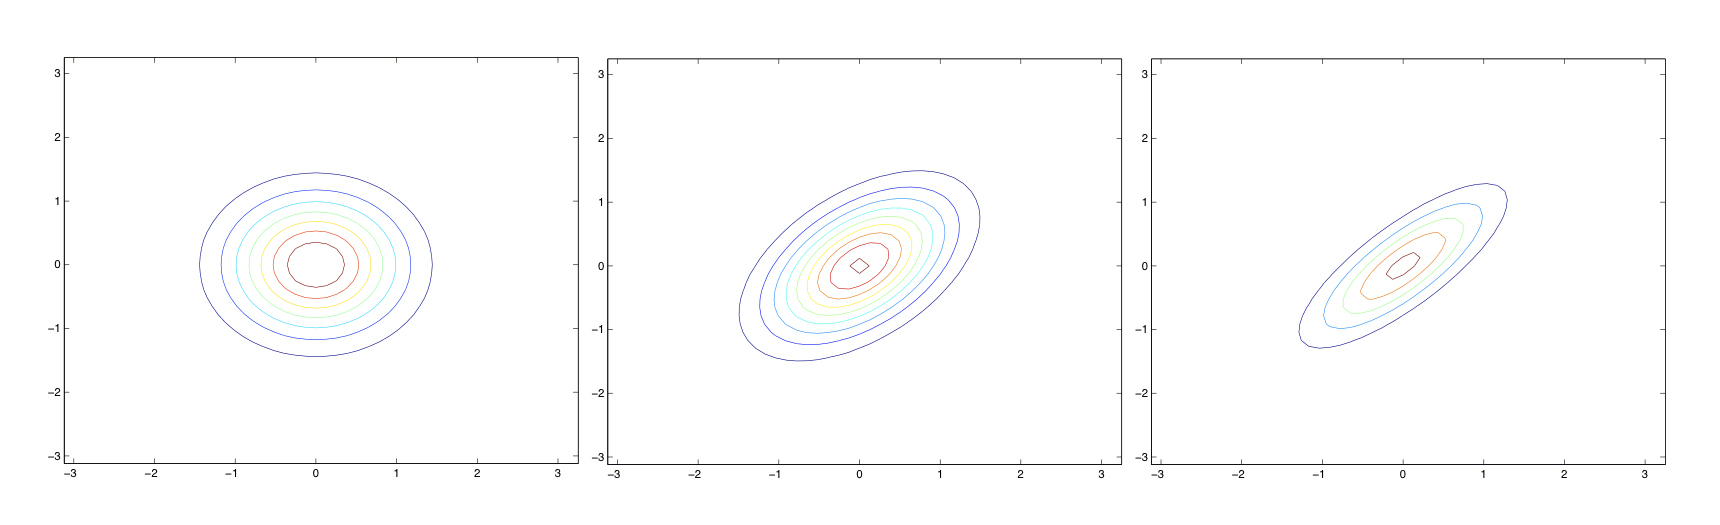

下面是另一组例子:

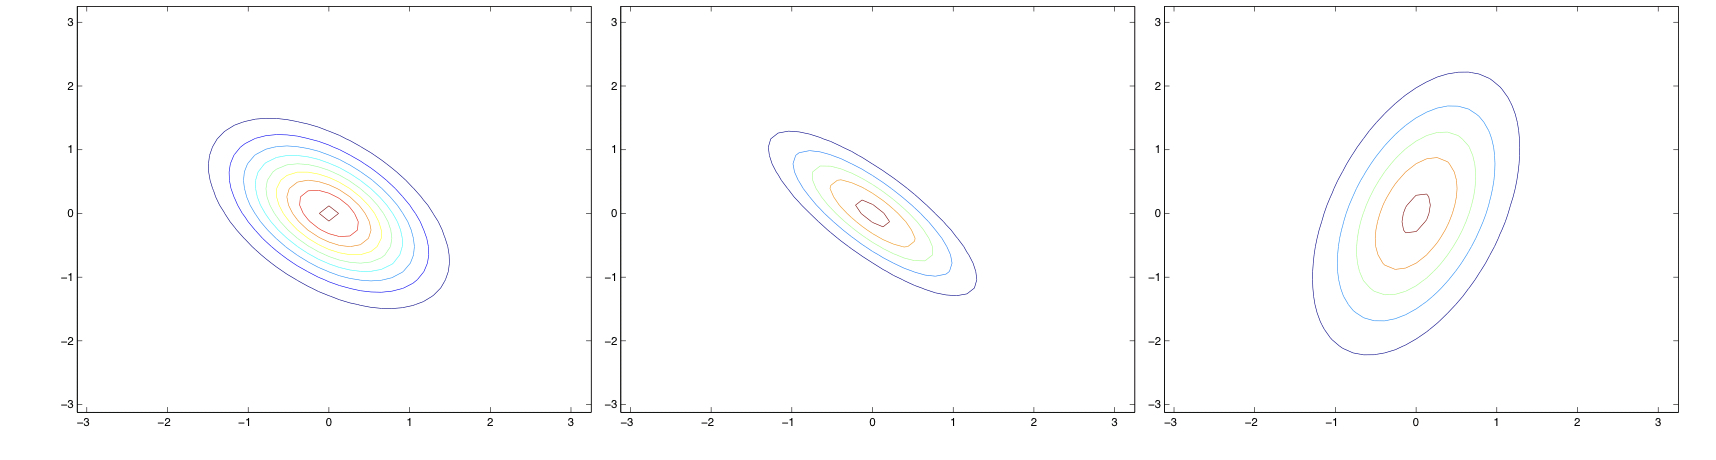

上图对应的协方差为：

$$\Sigma=
 \begin{bmatrix}
   1 & -0.5 \\
   -0.5 & 1
  \end{bmatrix} ;\Sigma=
 \begin{bmatrix}
   1 & -0.8 \\
   -0.8 & 1
  \end{bmatrix} ;\Sigma=
 \begin{bmatrix}
   3 & 0.8 \\
   0.8 & 1
  \end{bmatrix} 
$$

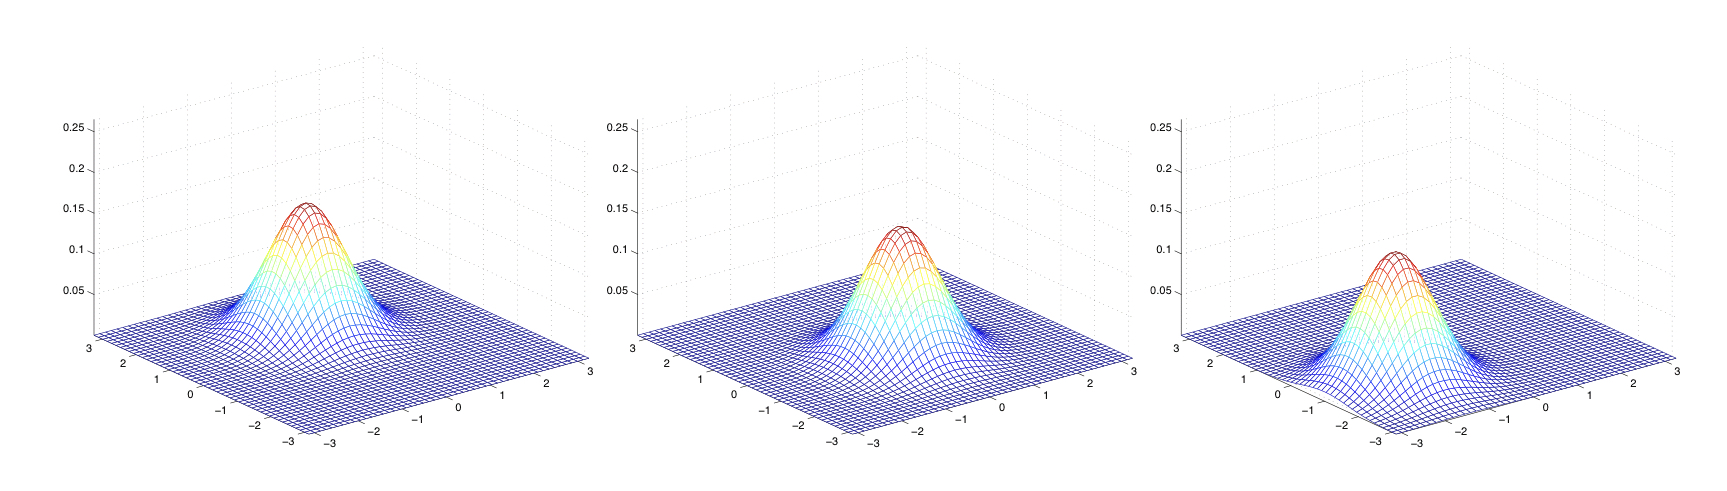

从左图和中图可以看到，随着元素值的减小（绝对值变大），分布在相反的方向上“压缩”得越明显；而在右图中我们改变了对角线上的元素值，分布变得更趋近于椭圆。

在最后一组例子中，令 $\Sigma=I$，通过改变 $\mu$ ，我们可以移动分布的中心：

总而言之，多元正态分布与正态分布一样是 **「钟型曲线」**，两个参数会影响分布的位置与形状：

* $\mu$ 会影响分布的位置（平移）
* $\Sigma$ 会影响分布的形状

### 2.2 高斯判别分析模型

对于一个分类问题，输入变量 $x$ 是连续随机变量，我们可以使用高斯判别分析(GDA)模型，对 $p(x|y)$ 使用多元正态分布建模，模型如下：

$$y \sim \text{Bernoulli}(\phi)$$

$$x|y=0 \sim N(\mu_0, \Sigma)$$

$$x|y=1 \sim N(\mu_1, \Sigma)$$

其概率密度如下：

$$p(y)=\phi^y (1-\phi)^{1-y}$$

$$p(x|y=0)=\frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}}exp(-\frac{1}{2}(x-\mu_0)^T \Sigma^{-1}(x-\mu_0))$$

$$p(x|y=1)=\frac{1}{(2\pi)^{n/2}|\Sigma|^{1/2}}exp(-\frac{1}{2}(x-\mu_1)^T \Sigma^{-1}(x-\mu_1))$$

这里模型的参数包括 $\phi,\Sigma,\mu_0,\mu_1$，注意两个分布 **「共享同一个协方差矩阵」**。

数据的对数似然函数如下：

$$l(\phi,\mu_0,\mu_1,\Sigma)=log\prod_{i=1}^{m}p(x^{(i)},y^{(i)};\phi,\mu_0,\mu_1,\Sigma)=log\prod_{i=1}^{m}p(x^{(i)}|y^{(i)};\phi,\mu_0,\mu_1,\Sigma)p(y^{(i)};\phi)$$

通过最大化 $l$，得到参数的最大似然估计为：

$$\phi=\frac{1}{m}\sum_{i=1}^m 1\{y^{(i)}=1\}$$

$$\mu_0=\frac{\sum_{i=1}^m 1\{y^{(i)}=0\} x^{(i)}}{\sum_{i=1}^m 1\{y^{(i)}=0\}}$$

$$\mu_1=\frac{\sum_{i=1}^m 1\{y^{(i)}=1\} x^{(i)}}{\sum_{i=1}^m 1\{y^{(i)}=1\}}$$

$$\Sigma=\frac{1}{m}\sum_{i=1}^m (x^{(i)}-\mu_{y^{(i)}}(x^{(i)}))$$